## Multivariate Normal Distribution``

In [4]:
import numpy as np
import math
import pandas as pd
import scipy
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go

[2.03236677 3.06769874] [0.96750559 1.90734834]


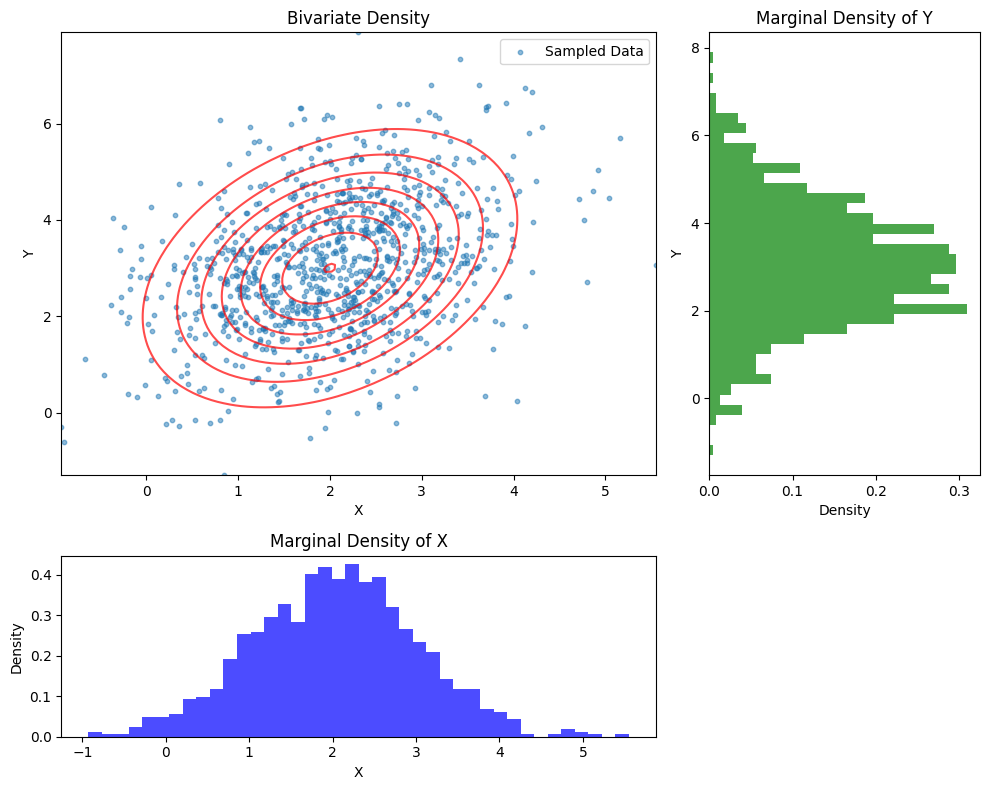

In [24]:
mean = [2, 3]
cov_matrix = [[1, 0.5], [0.5, 2]]
num_samples = 1000

samples = np.random.multivariate_normal(mean, cov_matrix, num_samples)
sample_mean = np.mean(samples, axis=0)
sample_var = np.var(samples, axis=0)
print(sample_mean, sample_var) #notice how close they are to actual mu/var

fig = plt.figure(figsize=(10, 8))
x, y = np.meshgrid(
    np.linspace(min(samples[:, 0]), max(samples[:, 0]), 100),
    np.linspace(min(samples[:, 1]), max(samples[:, 1]), 100))
pos = np.dstack((x, y))
pdf = stats.multivariate_normal.pdf(pos, mean=mean, cov=cov_matrix)

# Add a subplot for the bivariate density contour plot
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan=2)
ax1.contour(x, y, pdf, levels=10, colors='r', alpha=0.7)
ax1.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Sampled Data', s=10)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
ax1.set_title('Bivariate Density')

# Add subplots for the marginal density histograms
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax2.hist(samples[:, 0], bins=40, density=True, color='b', alpha=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Density')
ax2.set_title('Marginal Density of X')

ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax3.hist(samples[:, 1], bins=40, density=True, color='g', alpha=0.7, orientation='horizontal')
ax3.set_xlabel('Density')
ax3.set_ylabel('Y')
ax3.set_title('Marginal Density of Y')
plt.tight_layout()

## Cholesky Decomposition   

Cholesky decomposition is used in Monte Carlo simulations to generate correlated random variables with given statistics. This is basically done by taking the decomposition of the derived covariance matrix. Then, by multiplying the matrix  from the factorization by uncorrelated random samples, the resulting samples are correlated with the given covariance.  

In [17]:
covariance_matrix = np.array([
    [0.04, 0.015, 0.02, 0.012],
    [0.015, 0.03, 0.015, 0.01],
    [0.02, 0.015, 0.04, 0.02],
    [0.012, 0.01, 0.02, 0.03]])
cholesky_matrix = np.linalg.cholesky(covariance_matrix)

standard_deviations = np.diag(cholesky_matrix)
corr = cholesky_matrix / standard_deviations
corr
print(corr)

# Generate uncorrelated random variables (mean=0, variance=1)
n = 1000
uncorrelated_data = np.random.randn(2, n)

# Transform uncorrelated data to correlated data using the Cholesky matrix
correlated_data = np.dot(cholesky_matrix, uncorrelated_data)

# Calculate the sample correlation matrix of the generated data
sample_correlation_matrix = np.corrcoef(correlated_data)

# Display the sample correlation matrix
print("\nSample Correlation Matrix:")
print(sample_correlation_matrix)

[[1.         0.         0.         0.        ]
 [0.375      1.         0.         0.        ]
 [0.5        0.30769231 1.         0.        ]
 [0.3        0.22564103 0.44444444 1.        ]]


In [4]:
## Custom calculation
random.seed(0)

N = 5 # We create a 5x5 test matrix

A = []
for i in range(N):
    A.append(([random.random() for j in range(N)]))

# Make it symmetric    
for i in range(N):
    for j in range(N):
        A[i][j] = A[j][i]
        
# Make it positive semidefinite by making diagonals dominant 
for i in range(N):
    A[i][i] *= 10

L = [ [0] * N for i in range(N) ]

for i in range(N):
    for j in range(i+1):
        sum = 0
        for k in range(j+1):
            sum += L[i][k] * L[j][k]
            
        if i == j:
            L[i][i] = math.sqrt(A[i][i] - sum)
        else:
            L[i][j] = (1.0 / L[j][j]) * (A[i][j] - sum)